In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(city_data, ride_data, how="left", on="city")
# Display the data table for preview
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban = city_ride[city_ride['type'] == 'Urban']
suburban = city_ride[city_ride['type'] == 'Suburban']
rural = city_ride[city_ride['type'] == "Rural"]

urban_ride_count = urban.groupby(['city']).count()['ride_id']
urban_avg_fare = urban.groupby(['city']).mean()['fare']
urban_driver_count = urban.groupby(['city']).count()['driver_count']

suburban_ride_count = suburban.groupby(['city']).count()['ride_id']
suburban_avg_fare = suburban.groupby(['city']).mean()['fare']
suburban_driver_count = suburban.groupby(['city']).count()['driver_count']

rural_ride_count = rural.groupby(['city']).count()['ride_id']
rural_avg_fare = rural.groupby(['city']).mean()['fare']
rural_driver_count = rural.groupby(['city']).count()['driver_count']



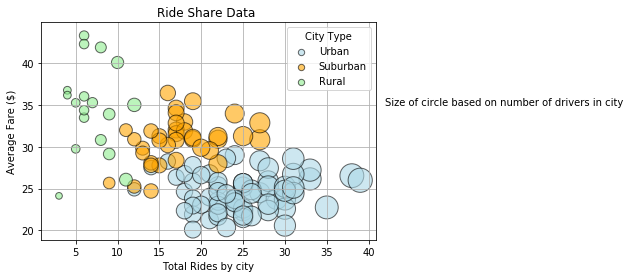

<Figure size 432x288 with 0 Axes>

In [4]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, urban_avg_fare, label="Urban", 
            color="lightblue", marker="o", edgecolor='black',
            s=15*urban_driver_count, alpha=0.6)

plt.scatter(suburban_ride_count, suburban_avg_fare, label="Suburban",
          color="orange", marker="o", edgecolor="black",
          s=15*suburban_driver_count, alpha=0.6)

plt.scatter(rural_ride_count, rural_avg_fare, label="Rural",
           color="lightgreen", marker='o', edgecolor='black',
           s=15*rural_driver_count, alpha=0.6)

# Incorporate the other graph properties
plt.xlabel("Total Rides by city")
plt.ylabel("Average Fare ($)")
plt.title("Ride Share Data ")
plt.grid()

# Create a legend
lgnd = plt.legend(title="City Type")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]


# Incorporate a text label regarding circle size
plt.text(42, 35, "Size of circle based on number of drivers in city")

# Show plot
plt.show()

# Save Figure
plt.savefig("bubbleplot.png")

## Total Fares by City Type

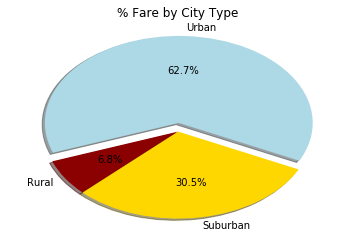

In [5]:
# Calculate Type Percents
tot_fare = city_ride['fare'].sum()
type_pct = (city_ride.groupby(['type']).sum()['fare'] / tot_fare) * 100

# Build Pie Chart
plt.pie(type_pct,
       labels=['Rural', 'Suburban', 'Urban'],
       autopct='%1.1f%%',
       startangle=200,
       explode=[0,0,0.1],
       shadow=True,
       colors = ['darkred','gold', 'lightblue'])
plt.title("% Fare by City Type")
# Save Figure
plt.savefig('pie_Fare')
# Show Figure
plt.show()

## Total Rides by City Type

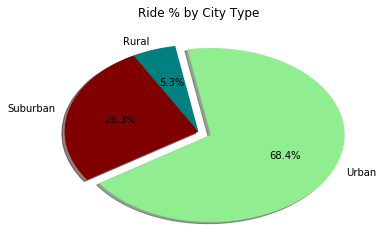

In [22]:
# Calculate Ride Percents
tot_ride = city_ride['ride_id'].count()
ride_pct = (city_ride.groupby(['type']).count()['ride_id'] / tot_ride) * 100
# Build Pie Chart
plt.pie(ride_pct,
       labels=['Rural', 'Suburban', 'Urban'],
       autopct='%1.1f%%',
       startangle=100,
       explode=[0,0,0.1],
       shadow=True,
       colors = ['teal','maroon', 'lightgreen'])
plt.title("Ride % by City Type")
# Save Figure
plt.savefig('pie_Ride_pct')
plt.show()

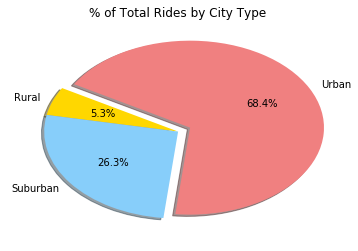

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

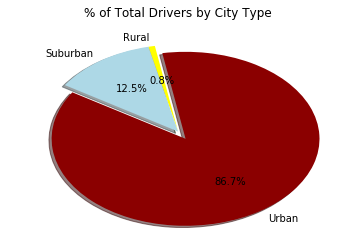

In [34]:
# Calculate Driver Percents
tot_ride = city_ride['driver_count'].count()
driver_pct = (city_ride.groupby(['type']).sum()['driver_count'] / tot_ride) * 100
driver_pct
# Build Pie Charts
plt.pie(driver_pct,
       labels=['Rural', 'Suburban', 'Urban'],
       autopct='%1.1f%%',
       startangle=100,
       explode=[0,0,0.1],
       shadow=True,
       colors = ['yellow','lightblue', 'darkred'])
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig('pie_driver_pct')

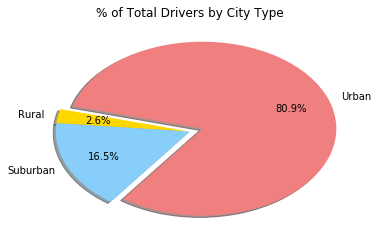

In [6]:
# Show Figure
plt.show()

# Trends
1. Average fare is highest in rural cities. This is may be due to increased distance between buildings.
2. Residents of urban cities are more likely to use a ride sharing service. 
3. Urban cities bring in more revenue than rural and suburban cities combined.